# Comportamento de Clientes - Empresa Megaline (telecomunicações)

# Introdução 

A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade. A análise preliminar dos planos terá base em uma pequena seleção de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018.
    

# Objetivo do Projeto 


O propósito deste projeto é analisar o comportamento dos clientes da Megaline para determinar qual plano pré-pago gera mais receita entre o Surf e o Ultimate. Com base nos dados fornecidos sobre os clientes, seus locais de residência, os planos que utilizam e o número de chamadas e mensagens realizadas em 2018, podemos realizar uma análise comparativa para entender qual plano é mais lucrativo para a empresa.

As ações planejadas para este projeto incluem: coleta e preparação de dados, análise descritiva, análise comparativa entre os planos, cálculo da receita média por cliente, teste de hipótese e apresentação dos resultados.

## Preparação dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt# Carregando todas as bibliotecas
from math import factorial
from scipy import stats as st


In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
users_df = pd.read_csv('/datasets/megaline_users.csv', sep = ',', decimal='.')
calls_df = pd.read_csv('/datasets/megaline_calls.csv', sep = ',', decimal='.')
messages_df = pd.read_csv('/datasets/megaline_messages.csv', sep = ',', decimal='.')
internet_df = pd.read_csv('/datasets/megaline_internet.csv', sep = ',', decimal='.')
plans_df = pd.read_csv('/datasets/megaline_plans.csv', sep = ',', decimal='.')

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


No conjunto de dados "/datasets/megaline_plans.csv", a coluna 3 é chamada de 'usd_monthly_pay', ao invés de 'usd_monthly_fee' como consta na descrição do projeto. Assim, utilizei o nome usado no conjunto de dados para evitar erros. 

In [4]:
# Imprima uma amostra de dados dos planos
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Correção dos dados

In [5]:
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype('float')
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype('float')

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


Os tipos de dados das colunas 'usd_monthly_pay' e 'usd_per_gb' foram convertidos para números flutuantes porque estamos tratando de valores monetários, e poderíamos perder detalhes dos dados.

In [6]:
# Encontre valores ausentes no DataFrame 'plans'

#missing_plans = plans_df.isna()
#print(missing_plans)

plans_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Não foram encontrados valores ausentes no dataframe 'plans'.

In [7]:
#Verificando se há valores duplicados 
plans_duplicated = plans_df.duplicated().sum()
print(plans_duplicated)

0


Não há valores duplicados no DataFrame 'plans'.

## Enriquecimento dos dados

In [8]:
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included']/1024

## Usuários

In [9]:
# column_names = [
#     'user_id',
#     'first_name',
#     'last_name',
#     'age',
#     'reg_date',
#     'churn_date',
#     'city',
#     'plan'
# ]

users_df.info()# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users_df.head() # Imprima uma amostra de dados dos usuários

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Devemos verificar se os tipos de dados de cada coluna estão apropriados para a análise. Por exemplo, as colunas reg_date e churn_date provavelmente devem ser convertidas para o tipo datetime se ainda não estiverem nesse formato.
Além disso, devemos verificar se há dados ausentes em algumas colunas, como churn_date, que pode ser ausente para clientes ativos. Se houver dados ausentes, precisaremos decidir como lidar com eles, seja preenchendo os valores ausentes ou excluindo as linhas correspondentes, dependendo do contexto.

### Correção dos dados

In [11]:
# Encontre valores ausentes na coluna 'product_name'
missing_users = users_df[users_df['churn_date'].isna()]
display(missing_users)

users_df['churn_date'].isna().sum()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


466

Foram encontrados 466 valores ausentes na coluna 'churn_date'.

Aqui, é preferível os não preencher os valores ausentes da coluna 'churn_date'pois não sabemos a data que o usuário irá cancelar o plano.

### Enriquecimento dos dados

Não há mais dados úteis a serem adicionados neste momento para este Data Frame. 

## Chamadas

In [12]:
# column_names = [
#     'id',
#     'call_date',
#     'duration',
#     'user_id'
# ]

calls_df.info()# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
calls_df.head()# Imprima uma amostra de dados das chamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Não há dados ausentes em nenhuma das colunas.

A coluna call_date está no tipo object, sugerindo que ela precisa ser convertida para o tipo datetime para facilitar a manipulação de datas.

A coluna duration parece estar no tipo adequado (float64) para representar a duração das chamadas.

### Correção dos dados

In [14]:
calls_df['duration'] = calls_df['duration'].astype('int')
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')
    
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


Convertemos o tipo de dados da coluna 'user_id' para objeto, da coluna 'duration' para inteiro e da coluna 'call_date' para o tipo datetime para fácil extrair o mês.  Não há valores ausentes. 

In [15]:
calls_duplicated = calls_df.duplicated().sum()
print(calls_duplicated) #Verificando se há valores duplicados 

0


Não foram encontrados valores duplicados. 

### Enriquecimento dos dados

In [16]:
calls_df['month'] = calls_df['call_date'].dt.month
calls_per_month = calls_df.groupby('month').size()

print(calls_per_month)

month
1       172
2       774
3      1620
4      3442
5      5959
6      8221
7     11105
8     13590
9     16523
10    21064
11    24651
12    30614
dtype: int64


Foi extraído o número de chamadas realizadas por mês.

In [17]:
minutes_per_month = calls_df.groupby('month')['duration'].sum()
print(minutes_per_month)

month
1       1047
2       4872
3       9941
4      21877
5      37824
6      52686
7      70744
8      85600
9     104871
10    132889
11    156683
12    195582
Name: duration, dtype: int64


Foi extraído o número de minutos usados por mês. 

## Mensagens

In [18]:
# column_names = [
#     'id',
#     'message_date ',
#     'user_id'
# ]

messages_df.info()# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
messages_df.head()# Imprima uma amostra dos dados das mensagens

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Não há dados ausentes em nenhuma das colunas.
A coluna message_date está no tipo object, sugerindo que ela precisa ser convertida para o tipo datetime para facilitar a manipulação de dados. 

### Correção dos dados

In [20]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format = '%Y-%m-%d')
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Convertemos o tipo de dados da coluna 'user_id' para objeto, e a coluna 'message_date' para o tipo DateTime. Não há valores ausentes. 

In [21]:
messages_duplicated = messages_df.duplicated().sum()
print(messages_duplicated) #Verificando se há valores duplicados 

0


Não foram encontrados valores duplicados.

### Enriquecimento dos dados

In [22]:
messages_df['month'] = messages_df['message_date'].dt.month
messages_per_month = messages_df.groupby('month').size()

print(messages_per_month)

month
1        83
2       259
3       594
4      1333
5      2780
6      3833
7      5208
8      7394
9      9227
10    12201
11    14068
12    19071
dtype: int64


Foi extraído o número de mensagens por mês. 

## Internet

In [23]:
# column_names = [
#     'id',
#     'mb_used',
#     'session_date',
#     'user_id'
# ]

internet_df.info()# Imprima as informações gerais/resumidas sobre o DataFrame da internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
internet_df.head()#  Imprima uma amostra de dados para o tráfego da internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Não há dados ausentes em nenhuma das colunas.
A coluna session_date está no tipo object, sugerindo que ela precisa ser convertida para o tipo datetime para facilitar a manipulação de dados.


#### Correção dos dados

In [25]:
internet_df['mb_used'] = internet_df['mb_used'].astype('int')# / 1024
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d')
    
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


Convertemos o tipo de dados da coluna 'user_id' para objeto, da coluna 'mb_used' para inteiro e da coluna 'session_date' para o tipo DateTime, facilitando a extração de informações do mês. Não há valores ausentes. 

In [26]:
internet_duplicated = internet_df.duplicated().sum()
print(internet_duplicated)

0


Não foram encontrados valores duplicados.

### Enriqueça os dados

In [27]:
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['gb_used'] = internet_df['mb_used'].astype('int') // 1024

gb_per_month = internet_df.groupby('month')['gb_used'].sum() # Agrupar os dados pelo mês e somar o volume de dados usados em cada mês

print(gb_per_month)

month
1       3
2      13
3      31
4      34
5      57
6      91
7     130
8     182
9     195
10    247
11    292
12    366
Name: gb_used, dtype: int64


Foi extraído o volume de dados(MB) usados por mês, mas convertidos para (GB) logo em seguida. 

## Estude as condições dos planos

In [28]:
plans_df.head()# Imprima as condições do plano e certifique-se de que elas fazem sentido para você



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Agregue os dados por usuário



In [29]:
calls_per_user_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_user')# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
print(calls_per_user_per_month)# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.



      user_id  month  calls_user
0        1000     12          16
1        1001      8          27
2        1001      9          49
3        1001     10          65
4        1001     11          64
...       ...    ...         ...
2253     1498     12          39
2254     1499      9          41
2255     1499     10          53
2256     1499     11          45
2257     1499     12          65

[2258 rows x 3 columns]


In [30]:
minutes_per_user_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_per_user')# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
print(minutes_per_user_per_month)


      user_id  month  minutes_per_user
0        1000     12               108
1        1001      8               160
2        1001      9               278
3        1001     10               348
4        1001     11               379
...       ...    ...               ...
2253     1498     12               308
2254     1499      9               312
2255     1499     10               344
2256     1499     11               269
2257     1499     12               441

[2258 rows x 3 columns]


In [31]:
messages_per_user_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_user')
print(messages_per_user_per_month)# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.



      user_id  month  messages_user
0        1000     12             11
1        1001      8             30
2        1001      9             44
3        1001     10             53
4        1001     11             36
...       ...    ...            ...
1801     1496      9             21
1802     1496     10             18
1803     1496     11             13
1804     1496     12             11
1805     1497     12             50

[1806 rows x 3 columns]


In [32]:
gb_per_user_per_month = internet_df.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='data_per_user')# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
print(gb_per_user_per_month)


      user_id  month  data_per_user
0        1000     12              0
1        1001      8              0
2        1001      9              1
3        1001     10              2
4        1001     11              1
...       ...    ...            ...
2272     1498     12              1
2273     1499      9              0
2274     1499     10              2
2275     1499     11              1
2276     1499     12              1

[2277 rows x 3 columns]


In [33]:
calls_per_user_per_month.to_csv('calls_per_user_per_month', index=False)
minutes_per_user_per_month.to_csv('minutes_per_user_per_month', index=False)
messages_per_user_per_month.to_csv('messages_per_user_per_month', index=False)
gb_per_user_per_month.to_csv('gb_per_user_per_month', index=False)

In [34]:
all_data = pd.merge(calls_per_user_per_month, messages_per_user_per_month, on=['user_id', 'month'], how='outer')
all_data = pd.merge(all_data, gb_per_user_per_month, on=['user_id', 'month'], how='outer')
all_data = pd.merge(all_data, minutes_per_user_per_month, on=['user_id', 'month'], how='outer')

all_data.head(20)

,user_id,month,calls_user,messages_user,data_per_user,minutes_per_user
0,1000,12,16.0,11.0,0.0,108.0
1,1001,8,27.0,30.0,0.0,160.0
2,1001,9,49.0,44.0,1.0,278.0
3,1001,10,65.0,53.0,2.0,348.0
4,1001,11,64.0,36.0,1.0,379.0
5,1001,12,56.0,44.0,2.0,368.0
6,1002,10,11.0,15.0,0.0,51.0
7,1002,11,55.0,32.0,1.0,338.0
8,1002,12,47.0,41.0,0.0,346.0
9,1003,12,149.0,50.0,2.0,987.0


In [35]:
# Adicione as informações sobre o plano
df_aux_plan = pd.merge(users_df[['user_id', 'plan']], plans_df, left_on='plan', right_on='plan_name')
all_data = pd.merge(all_data, df_aux_plan, how='outer', on='user_id')

all_data.head()

,user_id,month,calls_user,messages_user,data_per_user,minutes_per_user,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12.0,16.0,11.0,0.0,108.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
1,1001,8.0,27.0,30.0,0.0,160.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
2,1001,9.0,49.0,44.0,1.0,278.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
3,1001,10.0,65.0,53.0,2.0,348.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
4,1001,11.0,64.0,36.0,1.0,379.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0


In [36]:
def monthly_income(row): 
    income_minutes = 0
    income_message = 0 
    income_internet = 0


    minutes = row['minutes_included']
    messages = row['messages_included']
    internet = row['gb_per_month_included']
    usd_month_minutes = row['usd_per_minute']
    usd_month_messages = row['usd_per_message']
    usd_month_internet = row['usd_per_gb']
    
    
    if row ['minutes_per_user'] > minutes:
        income_minutes = (row ['minutes_per_user'] - minutes) * usd_month_minutes
    if row ['messages_user'] > messages:
        income_message = (row['messages_user'] - messages ) * usd_month_messages
    if row ['data_per_user'] > internet: 
        income_internet = (row['data_per_user'] - internet) * usd_month_internet
    return row['usd_monthly_pay'] + income_minutes + income_message + income_internet # retorna a receita final 

# Agora é só aplicar a função ao dataframe 
all_data['income'] = all_data.apply(monthly_income, axis = 1) 
    
# Calcule a receita mensal para cada usuário
all_data.head()

,user_id,month,calls_user,messages_user,data_per_user,minutes_per_user,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,income
0,1000,12.0,16.0,11.0,0.0,108.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0,70.00
1,1001,8.0,27.0,30.0,0.0,160.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,20.00
2,1001,9.0,49.0,44.0,1.0,278.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,20.00
3,1001,10.0,65.0,53.0,2.0,348.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,20.09
4,1001,11.0,64.0,36.0,1.0,379.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,20.00


## Estudo do comportamento do usuário

### Chamadas

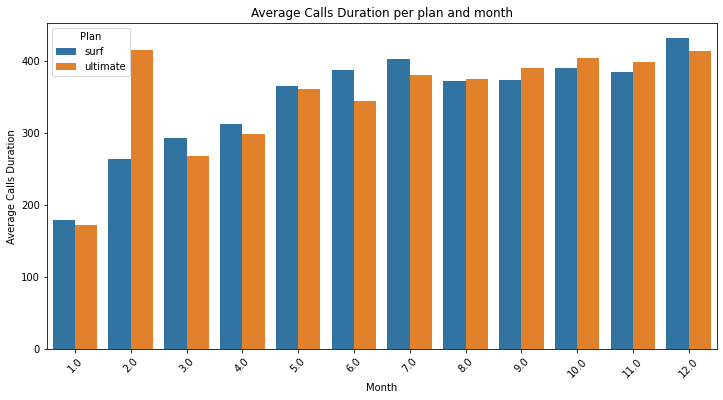

In [37]:
average_call_month = all_data.groupby(['plan_name', 'month'])['minutes_per_user'].mean()# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
average_call_month = average_call_month.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='minutes_per_user', hue='plan_name', data=average_call_month)
plt.title('Average Calls Duration per plan and month')
plt.xlabel('Month')
plt.ylabel('Average Calls Duration')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()


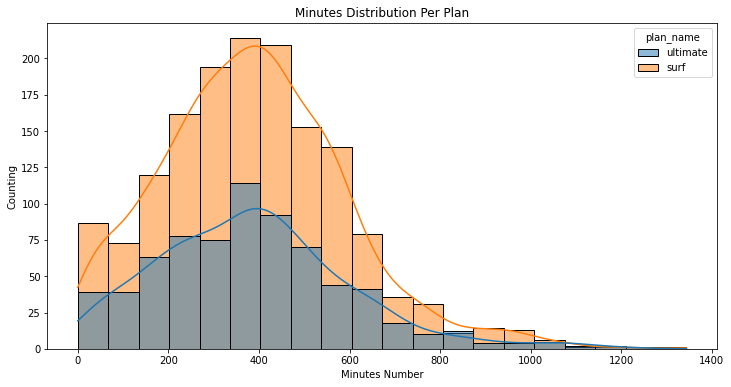

In [38]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
plt.figure(figsize=(12, 6))

#plan_names = all_data['plan_name'].unique()
# for plan_name in plan_names:
#     plan_data = all_data[all_data['plan_name'] == plan_name]
#     sns.histplot(all_data['minutes_per_user'], bins=20, kde=True, label=plan_name, alpha=0.5)

sns.histplot(data=all_data, x='minutes_per_user', hue='plan_name', bins=20, kde=True, alpha=0.5)
    
plt.title('Minutes Distribution Per Plan')
plt.xlabel('Minutes Number')
plt.ylabel('Counting')
#plt.legend(title='Plan Name')
plt.show()

In [39]:
monthly_call_duration_stats = all_data.groupby('month')['minutes_per_user'].agg(['mean', 'var'])# Calcule a média e a variação da duração mensal das chamadas
print(monthly_call_duration_stats)

             mean           var
month                          
1.0    174.500000  10340.300000
2.0    324.800000  44949.600000
3.0    284.028571  33565.028571
4.0    308.126761  36230.255131
5.0    363.692308  41809.671397
6.0    373.659574  33782.011854
7.0    395.217877  50633.463499
8.0    372.173913  41667.602810
9.0    378.595668  38452.009836
10.0   394.329377  39951.477498
11.0   388.791563  41411.215153
12.0   425.178261  47868.996476


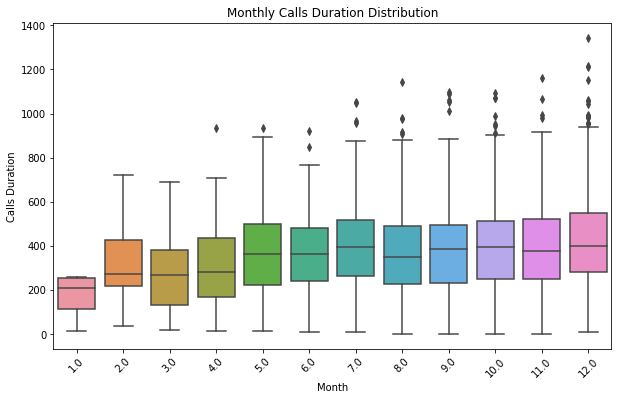

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='minutes_per_user', data=all_data)
plt.title('Monthly Calls Duration Distribution')
plt.xlabel('Month')
plt.ylabel('Calls Duration')
plt.xticks(rotation=45)
plt.show()# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

Podemos observar que a duração média das chamadas parece aumentar gradualmente de janeiro a dezembro, atingindo seu pico mais alto em dezembro. Além disso, a variância da duração das chamadas também mostra uma tendência semelhante de aumento ao longo do ano, indicando que a dispersão dos dados em torno da média também aumenta com o tempo.

Com base nessas observações, podemos concluir que o comportamento dos usuários em termos de chamadas parece ser semelhante entre os planos "Surf" e "Ultimate". Ambos os grupos de usuários mostram um aumento gradual na duração das chamadas ao longo do ano, sem diferenças marcantes na distribuição da duração das chamadas entre os planos. 

### Mensagens

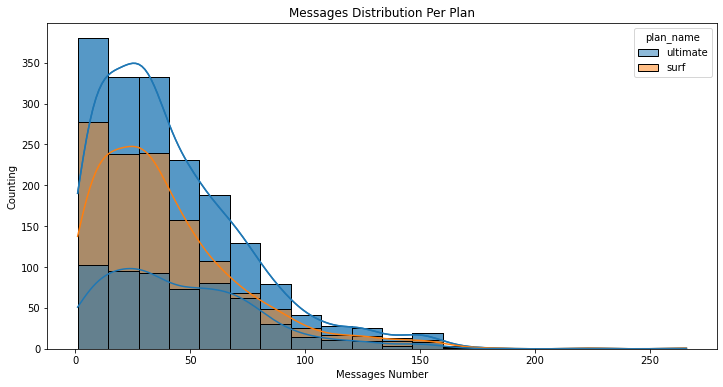

In [41]:
plt.figure(figsize=(12, 6))# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

plan_names = all_data['plan_name'].unique()
for plan_name in plan_names:
    plan_data = all_data[all_data['plan_name'] == plan_name]
    sns.histplot(all_data['messages_user'], bins=20, kde=True, label=plan_name, alpha=0.5)

sns.histplot(data=all_data, x='messages_user', hue='plan_name', bins=20, kde=True, alpha=0.5)
    
plt.title('Messages Distribution Per Plan')
plt.xlabel('Messages Number')
plt.ylabel('Counting')
#plt.legend(title='Plan Name')
plt.show()



In [42]:
monthly_messages_stats = all_data.groupby('month')['messages_user'].agg(['mean', 'var'])# Calcule a média e a variação das mensagens por mês
print(monthly_messages_stats)


            mean          var
month                        
1.0    20.750000   206.916667
2.0    23.545455   441.272727
3.0    25.826087   443.604743
4.0    25.634615   522.275641
5.0    36.103896   981.989064
6.0    34.531532   886.069451
7.0    37.739130   890.880355
8.0    40.850829  1037.405402
9.0    41.563063   935.106865
10.0   43.888489  1191.514596
11.0   42.759878  1037.481800
12.0   50.186842  1364.706423


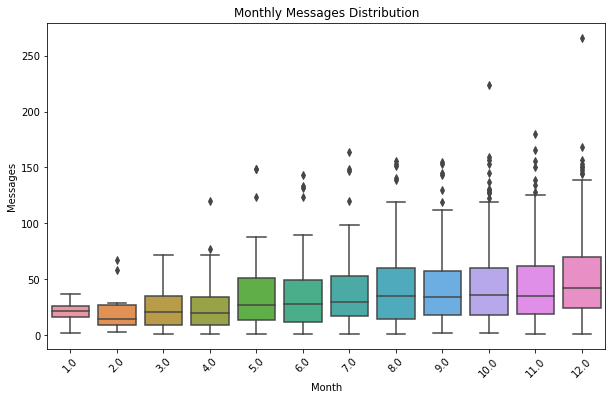

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='messages_user', data=all_data)
plt.title('Monthly Messages Distribution')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.xticks(rotation=45)
plt.show()

O número médio de mensagens enviadas por usuário parece aumentar gradualmente ao longo do ano, atingindo seu pico mais alto em dezembro. Além disso, a variância no número de mensagens enviadas também mostra uma tendência semelhante de aumento ao longo do ano, indicando que a dispersão dos dados em torno da média também aumenta com o tempo.

Não parece haver uma diferença significativa no número médio de mensagens por usuário entre os usuários dos planos "Surf" e "Ultimate" ao longo do ano, nem  na distribuição do número de mensagens dos usuários dos dois planos. Ambos os grupos mostram uma ampla variação no número de mensagens enviadas em todos os meses.

### Internet

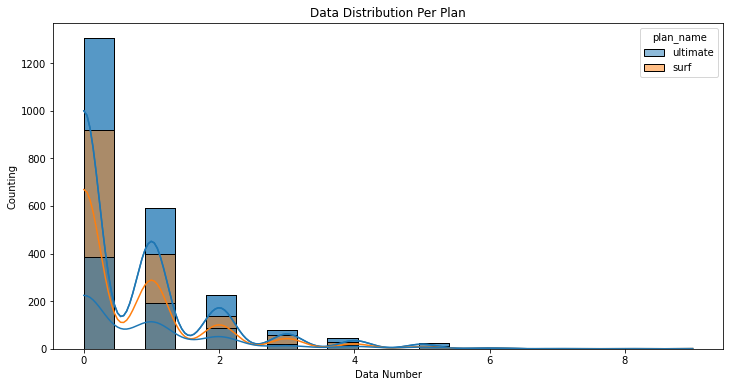

In [44]:
plt.figure(figsize=(12, 6))# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

plan_names = all_data['plan_name'].unique()
for plan_name in plan_names:
    plan_data = all_data[all_data['plan_name'] == plan_name]
    sns.histplot(all_data['data_per_user'], bins=20, kde=True, label=plan_name, alpha=0.5)
    
sns.histplot(data=all_data, x='data_per_user', hue='plan_name', bins=20, kde=True, alpha=0.5)
    
plt.title('Data Distribution Per Plan')
plt.xlabel('Data Number')
plt.ylabel('Counting')
#plt.legend(title='Plan Name')
plt.show()

In [45]:
monthly_data_stats = all_data.groupby('month')['data_per_user'].agg(['mean', 'var'])# Calcule a média e a variação da internet por mês
print(monthly_data_stats)

           mean       var
month                    
1.0    0.500000  0.700000
2.0    0.812500  0.829167
3.0    0.885714  1.810084
4.0    0.485714  0.601242
5.0    0.542857  1.096703
6.0    0.640845  0.912646
7.0    0.726257  1.087565
8.0    0.791304  1.615645
9.0    0.698925  1.275934
10.0   0.728614  1.121398
11.0   0.715686  1.049188
12.0   0.782051  1.404217


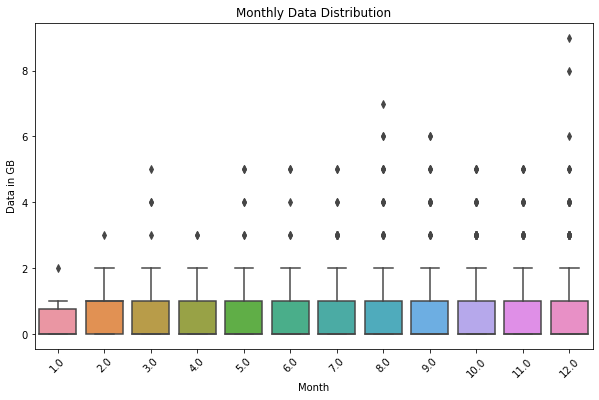

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='data_per_user', data=all_data)
plt.title('Monthly Data Distribution')
plt.xlabel('Month')
plt.ylabel('Data in GB')
plt.xticks(rotation=45)
plt.show()

O comportamento dos usuários em termos de consumo de tráfego de internet parece ser semelhante entre os planos "Surf" e "Ultimate". Ambos os grupos de usuários mostram um padrão de consumo de dados ao longo do ano, sem diferenças marcantes na distribuição ou na quantidade média de dados consumidos entre os planos. Isso sugere que os planos podem atender adequadamente às necessidades de consumo de dados dos clientes, independentemente do plano escolhido.

## Receita

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


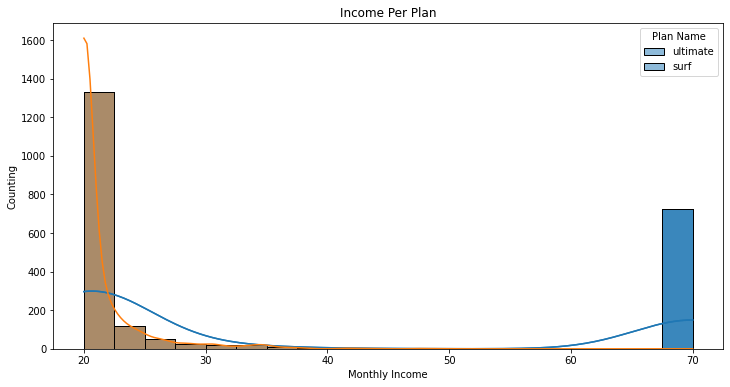

In [47]:
plt.figure(figsize=(12, 6))

plan_names = all_data['plan_name'].unique()

for plan_name in plan_names:
    plan_data = all_data[all_data['plan_name'] == plan_name]
    sns.histplot(all_data['income'], bins=20, kde=True, label=plan_name, alpha=0.5)
    
sns.histplot(data=all_data, x='income', hue='plan_name', bins=20, kde=True, alpha=0.5)
    
plt.title('Income Per Plan')
plt.xlabel('Monthly Income')
plt.ylabel('Counting')
plt.legend(title='Plan Name')
plt.show()

In [48]:
monthly_revenue_stats = all_data.groupby('month')['income'].agg(['mean', 'var'])# Calcule a média e a variação da internet por mês
print(monthly_revenue_stats)

            mean         var
month                       
1.0    53.333333  666.666667
2.0    42.308125  639.039056
3.0    37.442857  570.769039
4.0    35.245915  518.362773
5.0    34.456132  485.964990
6.0    37.063403  533.783381
7.0    37.406222  528.348482
8.0    36.046953  512.758157
9.0    36.058929  516.772076
10.0   36.376647  512.460866
11.0   36.353341  514.352181
12.0   37.442900  515.548019


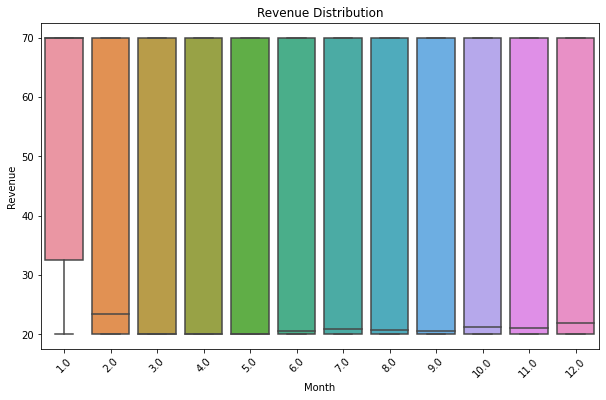

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='income', data=all_data)
plt.title('Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

Podemos concluir que as diferenças na receita entre os planos "Surf" e "Ultimate" não são significativas. Outros fatores além do plano em si podem influenciar a receita total, e uma análise mais aprofundada, considerando esses fatores adicionais, pode ser necessária para entender completamente a dinâmica da receita na empresa.

## Teste hipóteses estatísticas

In [56]:
revenue_surf = all_data[all_data['plan_name'] == 'surf']['income']
revenue_ultimate = all_data[all_data['plan_name'] == 'ultimate']['income']# Teste as hipóteses

# Definir a hipótese nula e alternativa
# Hipótese nula: As receitas médias dos usuários dos planos Ultimate e Surf são iguais
# Hipótese alternativa: As receitas médias dos usuários dos planos Ultimate e Surf são diferentes
    
# Avaliar se as variâncias são iguais
var_ultimate = revenue_ultimate.var()
var_surf = revenue_surf.var()
print("Variância da receita para o plano Ultimate:", var_ultimate)
print("Variância da receita para o plano Surf:", var_surf)

# Realizar o teste t de Student para amostras independentes
results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

alpha = 0.05

# imprimindo o valor-p resultante
print('valor-p: ', results.pvalue)

# comparando o valor-p com o limiar
if (results.pvalue < alpha):
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

Variância da receita para o plano Ultimate: 0.0
Variância da receita para o plano Surf: 9.318544932177797
valor-p:  0.0
Rejeitamos a hipótese nula.


In [57]:
revenue_ultimate.unique()

array([70.])

In [52]:
all_data = pd.merge(all_data, users_df[['user_id', 'city']], on='user_id', how='left')

In [55]:
idx = all_data['city'].str.contains('NY-NJ')
revenue_ny_nj = all_data[idx]['income']
revenue_other_regions = all_data[~idx]['income']# Teste as hipóteses

# Definir a hipótese nula e alternativa
# Hipótese nula: A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões
# Hipótese alternativa: A receita média dos usuários da área de NY-NJ é diferente da receita média dos usuários das demais regiões

# Avaliar se as variâncias são iguais
var_ny_nj = revenue_ny_nj.var()
var_other_regions = revenue_other_regions.var()
print("Variância da receita para NY-NJ:", var_ny_nj)
print("Variância da receita para outras regiões:", var_other_regions)

alpha = 0.05

results = st.ttest_ind(revenue_ny_nj, revenue_other_regions,equal_var=False)

print('Valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitar a hipótese nula.')
else:
    print('Não rejeitar a hipótese nula.')# Teste as hipóteses



Variância da receita para NY-NJ: 351.3933551660983
Variância da receita para outras regiões: 538.0397490538111
Valor p:  5.954647837095367e-14
Rejeitar a hipótese nula.


## Conclusão geral

Não foi encontrado evidências suficientes para concluir que as receitas médias dos usuários dos planos "Surf" e "Ultimate" são diferentes. Não identificamos diferenças significativas no comportamento de consumo de chamadas, mensagens e tráfego de internet entre os usuários dos dois planos.

Estatisticamente, chegamos a concolusão que a receita média dos usuários na área de NY-NJ difere da receita média dos usuários em outras regiões. Não identificamos diferenças significativas nas médias de consumo de serviços de telecomunicações entre usuários de NY-NJ e outras regiões.

Uma análise exploratória dos dados foi realizada, incluindo visualizações e estatísticas descritivas, para entender melhor o comportamento dos usuários. Essas conclusões são baseadas nas análises estatísticas realizadas e nas suposições feitas durante o processo de análise. Elas fornecem insights sobre a dinâmica da receita e do comportamento dos usuários, que podem ser úteis para orientar decisões de negócios e estratégias de marketing na empresa de telecomunicações.